In [2]:
import pandas as pd
import os 

# Dataset Import

In [3]:
## Critère, Score et Date entre 2 vidéos
comparisons = pd.read_csv('../../Dataset/comparisons.csv')

## Trustscore des utilisateurs
users = pd.read_csv('../../Dataset/users.csv')

## Critère, Score et Droit des vidéos pour chaque utilisateurs
individual_criteria_scores = pd.read_csv('../../Dataset/individual_criteria_scores.csv')

## Critère et score de chaque vidéo
collective_criteria_scores = pd.read_csv('../../Dataset/collective_criteria_scores.csv')

# Mining

In [4]:
comparisons.head(15)

public_username      video_a      video_b               criteria  score  \
0                0  xdk2Sargd3o  KyeJTbFCSv0    largely_recommended     -5   
1                0  xdk2Sargd3o  cCi9Iwj55EU    largely_recommended      0   
2                0  xdk2Sargd3o  cCi9Iwj55EU               pedagogy     -5   
3                0  xdk2Sargd3o  cCi9Iwj55EU             importance    -10   
4                0  xdk2Sargd3o  cCi9Iwj55EU        layman_friendly    -10   
5                0  xdk2Sargd3o  cCi9Iwj55EU  entertaining_relaxing     -6   
6                0  xdk2Sargd3o  cCi9Iwj55EU               engaging     -4   
7                0  xdk2Sargd3o  cCi9Iwj55EU    diversity_inclusion     -4   
8                0  xdk2Sargd3o  cCi9Iwj55EU          better_habits     -7   
9                0  xdk2Sargd3o  cCi9Iwj55EU          backfire_risk     -3   
10               0  xdk2Sargd3o  cCi9Iwj55EU            reliability     -4   
11               0  SddHqBSHNmI  cCi9Iwj55EU    largely_recommended     -3   
12        0b11stan  lj_Gsq78VvA  ebEkn-BiW5k               pedagogy      2   
13        0b11stan  lj_Gsq78VvA  ebEkn-BiW5k             importance      1   
14        0b11stan  lj_Gsq78VvA  ebEkn-BiW5k          backfire_risk      3   

     week_date  
0   2023-01-09  
1   2023-01-09  
2   2023-01-09  
3   2023-01-09  
4   2023-01-09  
5   2023-01-09  
6   2023-01-09  
7   2023-01-09  
8   2023-01-09  
9   2023-01-09  
10  2023-01-09  
11  2023-01-09  
12  2022-09-05  
13  2022-09-05  
14  2022-09-05

In [5]:
users[users['public_username'] == '0']

public_username  trust_score
0               0          0.8

In [6]:
comparisons[
    (comparisons['video_a'] == 'xdk2Sargd3o') & 
    (comparisons['video_b'] == 'cCi9Iwj55EU') & 
    (comparisons['public_username'] == '0')
]

public_username      video_a      video_b               criteria  score  \
1                0  xdk2Sargd3o  cCi9Iwj55EU    largely_recommended      0   
2                0  xdk2Sargd3o  cCi9Iwj55EU               pedagogy     -5   
3                0  xdk2Sargd3o  cCi9Iwj55EU             importance    -10   
4                0  xdk2Sargd3o  cCi9Iwj55EU        layman_friendly    -10   
5                0  xdk2Sargd3o  cCi9Iwj55EU  entertaining_relaxing     -6   
6                0  xdk2Sargd3o  cCi9Iwj55EU               engaging     -4   
7                0  xdk2Sargd3o  cCi9Iwj55EU    diversity_inclusion     -4   
8                0  xdk2Sargd3o  cCi9Iwj55EU          better_habits     -7   
9                0  xdk2Sargd3o  cCi9Iwj55EU          backfire_risk     -3   
10               0  xdk2Sargd3o  cCi9Iwj55EU            reliability     -4   

     week_date  
1   2023-01-09  
2   2023-01-09  
3   2023-01-09  
4   2023-01-09  
5   2023-01-09  
6   2023-01-09  
7   2023-01-09  
8   2023-01-09  
9   2023-01-09  
10  2023-01-09

In [7]:
individual_criteria_scores[
    (individual_criteria_scores['public_username'] == '0') & 
    (individual_criteria_scores['video'] == 'xdk2Sargd3o')
]

public_username        video               criteria  score  voting_right
12               0  xdk2Sargd3o          backfire_risk  81.29           0.8
13               0  xdk2Sargd3o          better_habits  80.47           0.8
14               0  xdk2Sargd3o    diversity_inclusion  73.62           0.8
15               0  xdk2Sargd3o               engaging  75.74           0.8
16               0  xdk2Sargd3o  entertaining_relaxing  83.41           0.8
17               0  xdk2Sargd3o             importance  65.02           0.8
18               0  xdk2Sargd3o    largely_recommended  74.70           0.8
19               0  xdk2Sargd3o        layman_friendly  52.24           0.8
20               0  xdk2Sargd3o               pedagogy  84.95           0.8
21               0  xdk2Sargd3o            reliability  85.25           0.8

In [8]:
collective_criteria_scores

video               criteria  score
0       009AGoQfVxA          backfire_risk -40.86
1       009AGoQfVxA          better_habits -41.21
2       009AGoQfVxA    diversity_inclusion -43.05
3       009AGoQfVxA               engaging -52.01
4       009AGoQfVxA  entertaining_relaxing  42.15
...             ...                    ...    ...
136845  zzXoqJn1VQw  entertaining_relaxing  -6.03
136846  zzXoqJn1VQw             importance   4.48
136847  zzXoqJn1VQw        layman_friendly   1.06
136848  zzXoqJn1VQw               pedagogy   1.43
136849  zzXoqJn1VQw            reliability   0.93

[136850 rows x 3 columns]

# Plot

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
all_criteria = collective_criteria_scores[['criteria', 'score']].groupby('criteria', as_index=False).mean()
all_criteria

criteria     score
0          backfire_risk -4.474762
1          better_habits -8.238673
2    diversity_inclusion -3.718309
3               engaging -8.014981
4  entertaining_relaxing -1.991629
5             importance -7.063941
6    largely_recommended -6.842567
7        layman_friendly -0.149657
8               pedagogy -6.633869
9            reliability -4.784591

<function matplotlib.pyplot.show(close=None, block=None)>

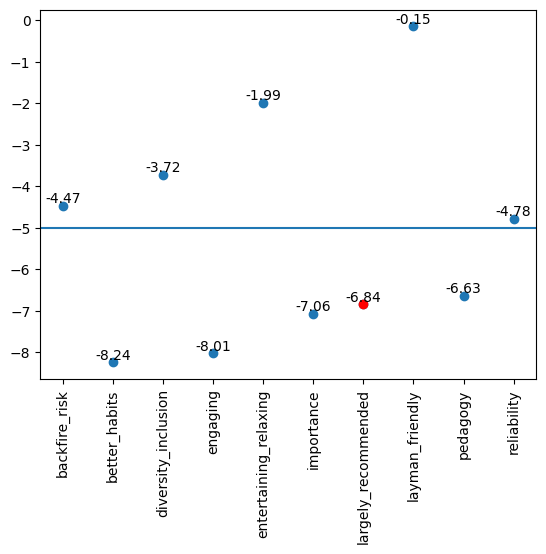

In [11]:
ax = plt.axes()
ax.scatter(all_criteria['criteria'], all_criteria['score'])
ax.scatter(all_criteria[all_criteria['criteria'] == 'largely_recommended']['criteria'], all_criteria[all_criteria['criteria'] == 'largely_recommended']['score'], color = 'red')
plt.axhline(np.nanmean(all_criteria[all_criteria['criteria'] != 'largely_recommended']['score']))
plt.xticks(rotation=90)
for (xi, yi) in zip(all_criteria['criteria'], all_criteria['score']):
    plt.text(xi, yi, round(yi,2), va='bottom', ha='center')
plt.show

# Viz

In [14]:
comparisons

public_username      video_a      video_b             criteria  score  \
0                    0  xdk2Sargd3o  KyeJTbFCSv0  largely_recommended     -5   
1                    0  xdk2Sargd3o  cCi9Iwj55EU  largely_recommended      0   
2                    0  xdk2Sargd3o  cCi9Iwj55EU             pedagogy     -5   
3                    0  xdk2Sargd3o  cCi9Iwj55EU           importance    -10   
4                    0  xdk2Sargd3o  cCi9Iwj55EU      layman_friendly    -10   
...                ...          ...          ...                  ...    ...   
450997             ᛗᚨᛏ  iW0LiIMYqrU  RCJ2SV1aGiw        backfire_risk      1   
450998             ᛗᚨᛏ  iW0LiIMYqrU  RCJ2SV1aGiw           importance     -2   
450999             ᛗᚨᛏ  iW0LiIMYqrU  RCJ2SV1aGiw             pedagogy     -1   
451000             ᛗᚨᛏ  iW0LiIMYqrU  RCJ2SV1aGiw          reliability      0   
451001             ᛗᚨᛏ  iW0LiIMYqrU  RCJ2SV1aGiw  largely_recommended      0   

         week_date  
0       2023-01-09  
1       2023-01-09  
2       2023-01-09  
3       2023-01-09  
4       2023-01-09  
...            ...  
450997  2022-11-21  
450998  2022-11-21  
450999  2022-11-21  
451000  2022-11-21  
451001  2022-11-21  

[451002 rows x 6 columns]

In [23]:
video_a = comparisons[comparisons['criteria'] == 'largely_recommended'][['week_date', 'video_a']].rename(columns = {'video_a':'video'})

In [35]:
video_a

week_date        video
0       2023-01-09  xdk2Sargd3o
1       2023-01-09  xdk2Sargd3o
11      2023-01-09  SddHqBSHNmI
20      2022-09-05  lj_Gsq78VvA
24      2022-09-05  lj_Gsq78VvA
...            ...          ...
450966  2022-11-21  KriTQ0aTrtw
450972  2022-11-21  L7Sj_ugHeWw
450981  2022-11-21  iW0LiIMYqrU
450985  2022-11-21  iW0LiIMYqrU
451001  2022-11-21  iW0LiIMYqrU

[77574 rows x 2 columns]

In [25]:
video_b = comparisons[comparisons['criteria'] == 'largely_recommended'][['week_date', 'video_b']].rename(columns = {'video_b':'video'})

In [27]:
frames = [video_a, video_b]

In [31]:
video_time = pd.concat(frames).drop_duplicates()

<Axes: xlabel='week_date'>

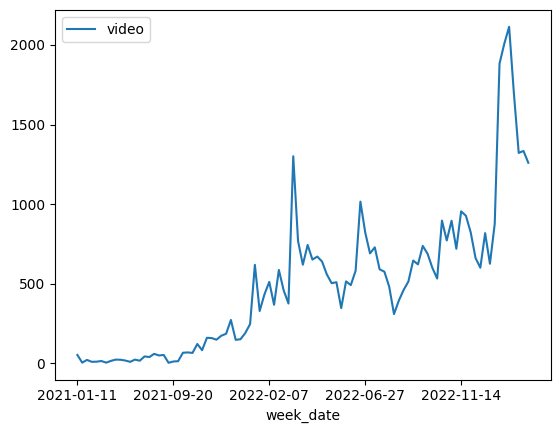

In [34]:
video_time.groupby(['week_date']).count().plot()

# Viz 2

<Axes: xlabel='week_date'>

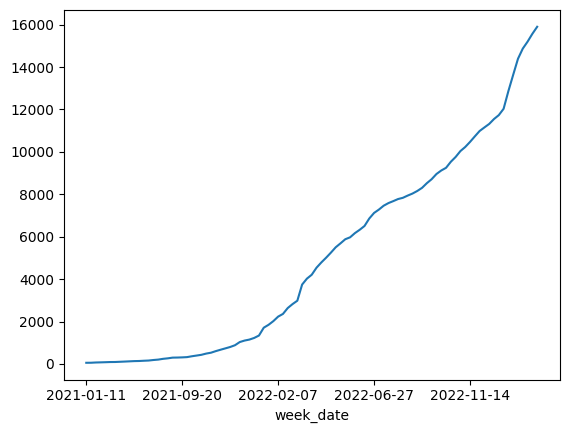

In [44]:
video_time.sort_values('week_date').drop_duplicates(subset=['video']).groupby(['week_date']).size().cumsum().plot()

In [46]:
video_time.sort_values('week_date').drop_duplicates(subset=['video'])

week_date        video
213594  2021-01-11  VnyaAmM1nhE
234929  2021-01-11  o4g6Jn2y_f4
235014  2021-01-11  lG4VkPoG3ko
3718    2021-01-11  RBEncgypGrU
210639  2021-01-11  MG7Gl7YWZTg
...            ...          ...
368237  2023-02-20  xKh5NEOMLsc
368210  2023-02-20  _XIeiSeV7I4
262948  2023-02-20  T2E3Yt4548Y
263004  2023-02-20  437q26DoVes
450871  2023-02-20  VozIm_h862w

[15901 rows x 2 columns]

In [49]:
import requests

BASE_URL = "https://api.tournesol.app"

session = requests.Session()
session.get(f"{BASE_URL}/stats").json()

{'active_users': {'total': 17199, 'joined_last_month': 687},
 'polls': [{'name': 'presidentielle2022',
   'compared_entities': {'total': 12, 'added_last_month': 0},
   'comparisons': {'total': 39823, 'added_last_month': 0}},
  {'name': 'videos',
   'compared_entities': {'total': 18764, 'added_last_month': 1310},
   'comparisons': {'total': 90250, 'added_last_month': 8459}}]}

In [54]:
## Récupérer les métadonnées d'une vidéo

youtube_video_id = "VnyaAmM1nhE"
response = session.get(f"{BASE_URL}/polls/videos/entities/yt:{youtube_video_id}")
response.json().get('score')

# API

In [141]:
import requests

BASE_URL = "https://api.tournesol.app"

session = requests.Session()
session.get(f"{BASE_URL}/stats").json()

{'active_users': {'total': 17192, 'joined_last_month': 717},
 'polls': [{'name': 'presidentielle2022',
   'compared_entities': {'total': 12, 'added_last_month': 0},
   'comparisons': {'total': 39823, 'added_last_month': 0}},
  {'name': 'videos',
   'compared_entities': {'total': 18705, 'added_last_month': 1297},
   'comparisons': {'total': 90091, 'added_last_month': 8566}}]}

In [17]:
##  Lister des vidéos en français publiées cette année à propos du climat, dont la durée est de moins de 3 minutes

response = session.get(
    f"{BASE_URL}/polls/videos/recommendations",
    params={
        "limit": 10,
        "search": "climat",
        "date_gte": "2023-01-01",
        "metadata[duration:lte:int]": 180,
        "metadata[language]": "fr",
        # "unsafe=true" will include videos that are not "safe" according to Tournesol,
        # because of a score too low or not enough contributions.
        "unsafe": "false",
    }
)
response.json()

{'count': 3,
 'next': None,
 'previous': None,
 'results': [{'uid': 'yt:Won4JyG9-QQ',
   'type': 'video',
   'n_comparisons': 28,
   'n_contributors': 16,
   'metadata': {'name': "Comment faire accepter les efforts d'adaptation face au changement climatique ? - Aurélien Barrau",
    'tags': ['écologie',
     'collapse',
     'effondrement',
     'environnement',
     'énergies',
     'économie',
     'politique',
     'science',
     'technologie',
     'pétrole',
     'pic de pétrole',
     'peak oil',
     'collapsologie',
     'humanité',
     'extinction',
     'anthropocène',
     'décroissance',
     'climat',
     'réchauffement climatique',
     'biodiversité',
     'co2',
     'giec',
     'réfugiés',
     'guerre',
     'ressources',
     'capitalisme',
     'urgence',
     'chaos',
     'ges',
     'pénurie',
     'jancovici',
     'cop21',
     'antarctique',
     'permafrost',
     'planète',
     'carbone',
     'scientifique',
     'france',
     'crise',
     'migration

In [18]:
## Récupérer les métadonnées d'une vidéo

youtube_video_id = "dQw4w9WgXcQ"
response = session.get(f"{BASE_URL}/polls/videos/entities/yt:{youtube_video_id}")
response.json()

{'uid': 'yt:dQw4w9WgXcQ',
 'type': 'video',
 'n_comparisons': 3,
 'n_contributors': 1,
 'metadata': {'name': 'Rick Astley - Never Gonna Give You Up (Official Music Video)',
  'tags': ['rick astley',
   'Never Gonna Give You Up',
   'nggyu',
   'never gonna give you up lyrics',
   'rick rolled',
   'Rick Roll',
   'rick astley official',
   'rickrolled',
   'Fortnite song',
   'Fortnite event',
   'Fortnite dance',
   'fortnite never gonna give you up',
   'rick roll',
   'rickrolling',
   'rick rolling',
   'never gonna give you up',
   '80s music',
   'rick astley new',
   'animated video',
   'rickroll',
   'meme songs',
   'never gonna give u up lyrics',
   'Rick Astley 2022',
   'never gonna let you down',
   'animated',
   'rick rolls 2022',
   'never gonna give you up karaoke'],
  'views': 1356355894,
  'source': 'youtube',
  'duration': 213,
  'language': 'en',
  'uploader': 'Rick Astley',
  'video_id': 'dQw4w9WgXcQ',
  'channel_id': 'UCuAXFkgsw1L7xaCfnd5JJOw',
  'description': 

In [142]:
## Lister les recommendations publiques d'un utilisateur

username = "le_science4all"
response = session.get(f"{BASE_URL}/users/{username}/recommendations/videos", params={
    "limit": 10,
    # "unsafe=false" (the default value) would exclude videos that are not "safe" according to Tournesol,
    # based on all users contributions, because of a score too low or not enough contributions.
    "unsafe": "true"
})
response.json()

{'count': 1162,
 'next': 'https://api.tournesol.app/users/le_science4all/recommendations/videos?limit=10&offset=10&unsafe=true',
 'previous': None,
 'results': [{'uid': 'yt:WPPPFqsECz0',
   'type': 'video',
   'n_comparisons': 400,
   'n_contributors': 106,
   'metadata': {'name': 'An Antidote to Dissatisfaction',
    'tags': ['Gratitude',
     'Dissatisfaction',
     'Happiness',
     'Happy',
     'Success',
     'Satisfaction',
     'Relationship',
     'Work',
     'Job',
     'Social Media',
     'Pop Culture',
     'Advertisement',
     'Attractiveness',
     'Beauty',
     'beautiful',
     'Self Improvement',
     'Positive Psychology',
     'Behavioural Psychology',
     'Behaviourism',
     'Behaviour Psychology',
     'Antidote',
     'Trait gratitude',
     'grateful',
     'gratefulness',
     'evolution',
     'reciprocity',
     'social',
     'society',
     'friendships',
     'loneliness',
     'Brain',
     'Envy',
     'Depression',
     'Trauma',
     'self help',


In [160]:
pd.DataFrame(response.json())['results'][0]

{'uid': 'yt:WPPPFqsECz0',
 'type': 'video',
 'n_comparisons': 400,
 'n_contributors': 106,
 'metadata': {'name': 'An Antidote to Dissatisfaction',
  'tags': ['Gratitude',
   'Dissatisfaction',
   'Happiness',
   'Happy',
   'Success',
   'Satisfaction',
   'Relationship',
   'Work',
   'Job',
   'Social Media',
   'Pop Culture',
   'Advertisement',
   'Attractiveness',
   'Beauty',
   'beautiful',
   'Self Improvement',
   'Positive Psychology',
   'Behavioural Psychology',
   'Behaviourism',
   'Behaviour Psychology',
   'Antidote',
   'Trait gratitude',
   'grateful',
   'gratefulness',
   'evolution',
   'reciprocity',
   'social',
   'society',
   'friendships',
   'loneliness',
   'Brain',
   'Envy',
   'Depression',
   'Trauma',
   'self help',
   'Gratitude Journal',
   'Gratitude Journaling',
   'habit'],
  'views': 13990366,
  'source': 'youtube',
  'duration': 601,
  'language': 'en',
  'uploader': 'Kurzgesagt – In a Nutshell',
  'video_id': 'WPPPFqsECz0',
  'channel_id': 'UC